## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

y_train, y_test = to_categorical(train_labels), to_categorical(test_labels)

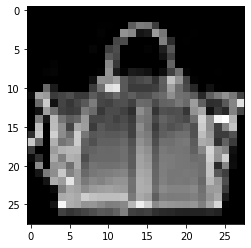

In [ ]:
plt.imshow(train_images[np.random.randint(len(train_images))].squeeze(), cmap="gray")
plt.show()

In [ ]:
train_images = train_images / 255.
test_images = test_images / 255.

In [ ]:
valid_images, test_images, y_valid, y_test = train_test_split(test_images, y_test, test_size=0.5, random_state=42)

In [ ]:
batch_size = 128
buffer_size = 256

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((train_images.reshape((-1, 784)), y_train)).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images.reshape((-1, 784)), y_valid)).batch(batch_size).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((test_images.reshape((-1, 784)), y_test)).batch(batch_size).prefetch(AUTOTUNE)

In [ ]:
num_neurons = [512, 256, 128]

for i, neurons in enumerate(num_neurons):
    model = Sequential([
        Dense(neurons, activation="relu", input_shape=(784,)),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # default lr = 1e-3
    print(f"Experiment {i+1} with {neurons} neurons".center(100, "_"))
    history = model.fit(train_ds,
                        epochs=15,
                        validation_data=valid_ds,
                        verbose=1)
    model.evaluate(test_ds)

___________________________________Experiment 1 with 512 neurons____________________________________
Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5081 - accuracy: 0.8220 - val_loss: 0.4365 - val_accuracy: 0.8452
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3749 - accuracy: 0.8663 - val_loss: 0.4031 - val_accuracy: 0.8600
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3306 - accuracy: 0.8813 - val_loss: 0.3664 - val_accuracy: 0.8708
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3059 - accuracy: 0.8889 - val_loss: 0.3760 - val_accuracy: 0.8642
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2846 - accuracy: 0.8968 - val_loss: 0.3449 - val_accuracy: 0.8826
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2722 - accuracy: 0.9009 - val_loss: 0.3387 - val_accuracy: 0.8820
Epoch 7/15
469/469 [===========================

In [ ]:
num_layers = [2,3,5,10]

num_layers = [[16 * (2**j) for j in range(1, i)] for i in num_layers]
num_layers

[[32],
 [32, 64],
 [32, 64, 128, 256],
 [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]]

In [ ]:
for i, layers in enumerate(num_layers): 
    layers = [Dense(neurons, activation="relu") for neurons in sorted(num_layers[i], reverse=True)]
    last_layer = [Dense(10, activation="softmax")]
    model = Sequential([Input(shape=(784,))] + layers + last_layer)

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  # default lr = 1e-3
    print(f"Experiment {i+1} with {len(layers) + 1} layers".center(100, "_"))
    history = model.fit(train_ds,
                        epochs=10,
                        validation_data=valid_ds,
                        verbose=2)
    model.evaluate(test_ds)

_____________________________________Experiment 1 with 2 layers_____________________________________
Epoch 1/10
469/469 - 2s - loss: 0.6705 - accuracy: 0.7746 - val_loss: 0.5216 - val_accuracy: 0.8166 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 2s - loss: 0.4602 - accuracy: 0.8416 - val_loss: 0.4826 - val_accuracy: 0.8280 - 2s/epoch - 3ms/step
Epoch 3/10
469/469 - 1s - loss: 0.4215 - accuracy: 0.8538 - val_loss: 0.4477 - val_accuracy: 0.8372 - 1s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.3989 - accuracy: 0.8599 - val_loss: 0.4383 - val_accuracy: 0.8430 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 2s - loss: 0.3817 - accuracy: 0.8667 - val_loss: 0.4239 - val_accuracy: 0.8492 - 2s/epoch - 3ms/step
Epoch 6/10
469/469 - 2s - loss: 0.3689 - accuracy: 0.8701 - val_loss: 0.4179 - val_accuracy: 0.8522 - 2s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.3586 - accuracy: 0.8737 - val_loss: 0.4090 - val_accuracy: 0.8560 - 2s/epoch - 3ms/step
Epoch 8/10
469/469 - 2s - loss: 0.3480 - accu

**Промежуточные Выводы**

* сложно сказать насколько различия в полученных значенияч метрики являются статистически значимыми - почти все модели переобучились, а отличие небольшое, возможно, стоит добавить регуляризацию и провести больше независимых экспериментов (начальные веса инициализируются случайным образом, что тоже может привести к различиям к итоговой метрики, особоенно когда от модели к модели она отличается не сильно);
* качество сильно зависист от глубины сети (количества слоев) и размера (количества нейоров) скрытых слоев: чем больше, тем больше модель способна уловить паттернов в данных. Однако при слишком большом их количестве точность модели может сильно упасть или модель вовсе сильно переобучится. Нужно искать баланс, исходя из данных.
* Очень важно для каждого варианта сети подыскать оптимальные: скорость обучения, размер пакета (ксати, есть высокая зависимость между скоростью обучения и размером пакета; в некоторых научных работах даже утверждается, что менять можно только размер пакета при неизменной скорости обучения), степень регуляризации и т.д.


In [ ]:
model = Sequential([Dense(128, activation="relu", input_shape=(784,)),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax'),
                    ])

model.save_weights('model.h5')

epochs = 15

for i, optim in enumerate(['SGD','RMSProp','adam','NAdam']):
    model = Sequential([
                        Dense(128, activation="relu", input_shape=(784,)),
                        Dense(64, activation='relu'),
                        Dense(10, activation='softmax'),
                        ])  
    model.load_weights('model.h5')
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'],)

    history = model.fit(
                        train_ds,
                        epochs=epochs,
                        validation_data=valid_ds,
                        verbose=0
                        )
    train_acc = model.evaluate(train_ds, verbose = 0)
    valid_acc = model.evaluate(test_ds, verbose = 0)
    print(f"Experiment with '{optim}': train accuracy: {train_acc[1]:.4f}, test accuracy: {valid_acc[1]:.4f}".center(40, "_"),"\n")

Experiment with 'SGD': train accuracy: 0.8569, test accuracy: 0.8448 

Experiment with 'RMSProp': train accuracy: 0.9212, test accuracy: 0.8878 

Experiment with 'adam': train accuracy: 0.9182, test accuracy: 0.8746 

Experiment with 'NAdam': train accuracy: 0.9241, test accuracy: 0.8820 



Снова сложно сделать уверенное утверждение. Однако, очевидно, что в данном случае адаптивные оптимизаторы дают небольшой прирост в качестве. Здесь стоит не забывать, что SGD может потребоваться больше времени на сходимость, а также что он считается более устойчивым в вычислительном плане.

In [ ]:
from itertools import product
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<Figure size 360x360 with 0 Axes>

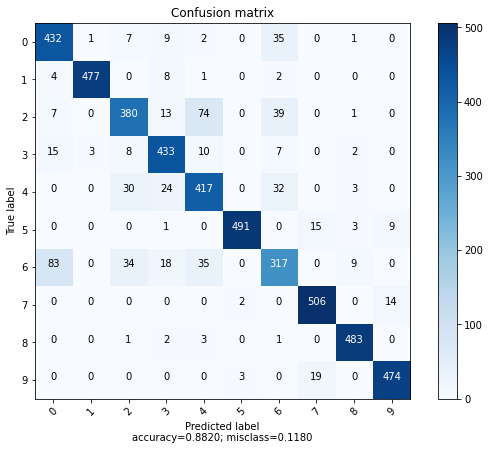

In [ ]:
y_true = y_test.argmax(1)
y_pred = model.predict(test_images.reshape((-1, 784))).argmax(1)

cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, target_names=[i for i in range(10)], normalize=False, title='Confusion matrix',)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))
# хуже всего модель справляется с классом 6

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       487
           1       0.99      0.97      0.98       492
           2       0.83      0.74      0.78       514
           3       0.85      0.91      0.88       478
           4       0.77      0.82      0.80       506
           5       0.99      0.95      0.97       519
           6       0.73      0.64      0.68       496
           7       0.94      0.97      0.95       522
           8       0.96      0.99      0.97       490
           9       0.95      0.96      0.95       496

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



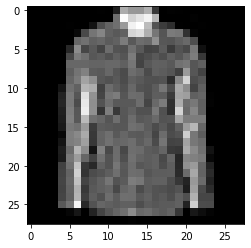

In [ ]:
plt.imshow(test_images[y_test.argmax(1) == 6][0].squeeze(), cmap="gray")
plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((train_images, y_train)).shuffle(buffer_size).batch(batch_size).prefetch(AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, y_valid)).batch(batch_size).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, y_test)).batch(batch_size).prefetch(AUTOTUNE)

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=input_shape),
                                    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(axis=1),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [ ]:
callbacks = [
             tf.keras.callbacks.ReduceLROnPlateau(patience=3),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
            ]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)      

In [ ]:
history = model.fit(train_ds, epochs=100, validation_data=valid_ds, callbacks=callbacks, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 20s 9ms/step - loss: 0.9727 - accuracy: 0.6903 - val_loss: 0.6648 - val_accuracy: 0.7974 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6410 - accuracy: 0.8153 - val_loss: 0.5227 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5573 - accuracy: 0.8495 - val_loss: 0.4519 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5162 - accuracy: 0.8646 - val_loss: 0.4372 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4883 - accuracy: 0.8770 - val_loss: 0.4233 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4722 - accuracy: 0.8812 - val_loss: 0.4078 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 7/100
1875/1875 [=======================

In [ ]:
model.evaluate(test_ds)
# необходимо подбирать гиперпараметры: можно выжать до 95% accuracy

157/157 [==============================] - 1s 4ms/step - loss: 0.2099 - accuracy: 0.9364


[0.20985166728496552, 0.9363999962806702]

### Transfer Learning & Augmentation

In [ ]:
from tensorflow.keras.backend import resize_images

In [ ]:
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

y_train, y_test = to_categorical(train_labels), to_categorical(test_labels)

In [ ]:
train_images = np.repeat((train_images / 127.5) - 1, 3, -1)
test_images = np.repeat((test_images / 127.5) - 1, 3, -1)

In [ ]:
valid_images, test_images, y_valid, y_test = train_test_split(test_images, y_test, test_size=0.5, random_state=42)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.1),
  tf.keras.layers.GaussianNoise(0.05),
])

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( 
        rotation_range=10,       
        width_shift_range=0.2,    
        height_shift_range=0.2,   
        shear_range=0.2,          
        zoom_range=0.2,           
        horizontal_flip=True,
        fill_mode='nearest'      
    )

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(train_images, y_train, 
                                     batch_size=batch_size,
                                     seed=123)
val_generator = train_datagen.flow(valid_images, y_valid, 
                                         batch_size=batch_size,
                                         seed=123)
test_generator = test_datagen.flow(test_images, y_test, 
                                   batch_size=batch_size,
                                   seed=123)

In [ ]:
input_image = Input(shape=(28, 28, 3))
resized_image = Lambda(lambda image: resize_images(x=image, height_factor=2, width_factor=2, data_format='channels_last'))(input_image)

In [ ]:
# base_model = tf.keras.applications.ResNet50V2(include_top=False, weights="imagenet", input_tensor=resized_image)
base_model = tf.keras.applications.MobileNet(include_top=False, weights="imagenet", input_tensor=resized_image)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output

x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions, name='resnet')

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
             tf.keras.callbacks.ReduceLROnPlateau(patience=3),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
            ]

In [ ]:
for layer in model.layers[:87]:  # 191 for resnet
    layer.trainable = False

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=callbacks, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 53s 26ms/step - loss: 0.8456 - accuracy: 0.7400 - val_loss: 0.5157 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 48s 25ms/step - loss: 0.5683 - accuracy: 0.8123 - val_loss: 0.5449 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5257 - accuracy: 0.8275 - val_loss: 0.3940 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4645 - accuracy: 0.8463 - val_loss: 0.4664 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4394 - accuracy: 0.8543 - val_loss: 0.3925 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4134 - accuracy: 0.8615 - val_loss: 0.3651 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 7/100
1875/1875 [=================

In [ ]:
model.evaluate(test_generator)
# не лучший результат, возможно, не имеет смысла применять к таким маленьким монотонным картинкам глубокие сети (либо быть осторожнее с аугментацией)

157/157 [==============================] - 1s 7ms/step - loss: 0.2426 - accuracy: 0.9176


[0.24264098703861237, 0.9175999760627747]